In [54]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

In [55]:
# Load data and view it
data = pd.read_csv("insurance.csv")

In [56]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [57]:
data.shape

(1338, 7)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [59]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [60]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

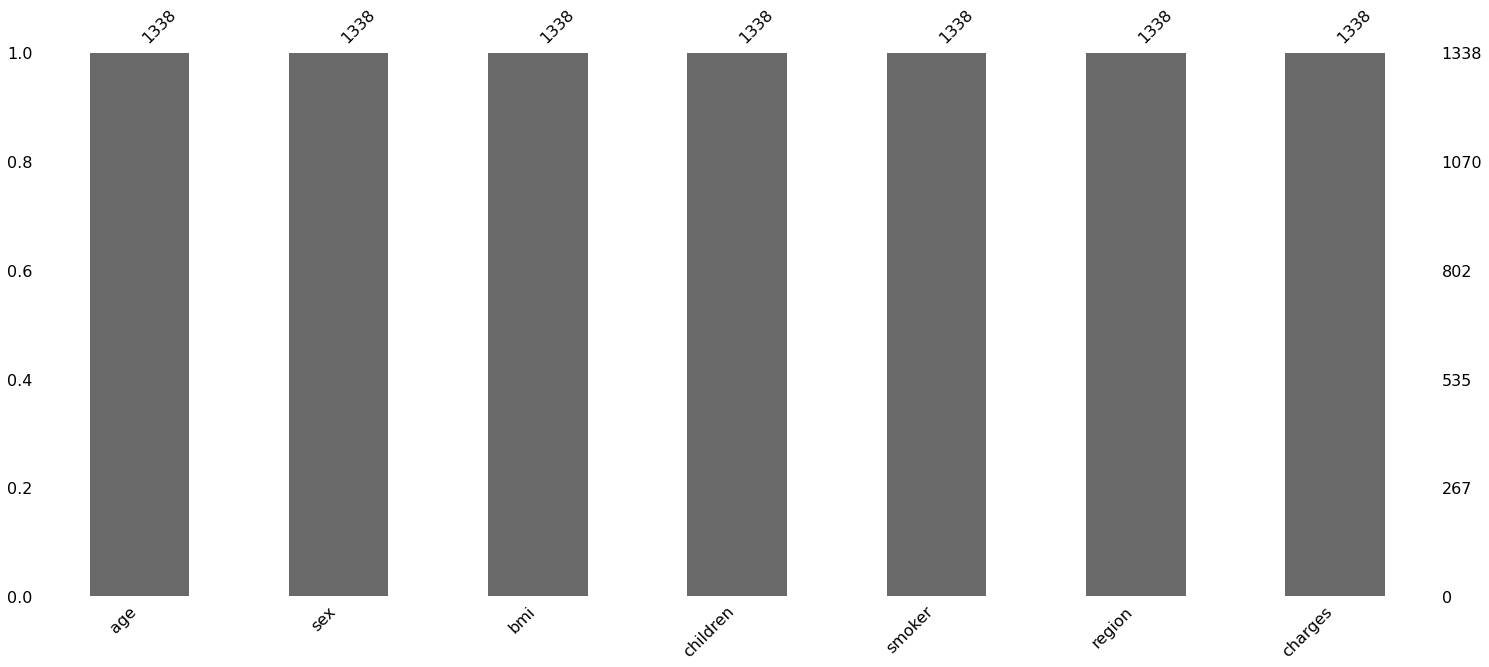

In [61]:
mno.bar(data);

In [62]:
data["smoker"].nunique()

2

In [63]:
data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

male      676
female    662
Name: sex, dtype: int64


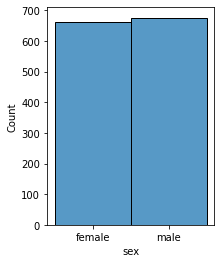

In [64]:
print(data["sex"].value_counts())
plt.figure(figsize=(3,4))
sns.histplot(data=data, x="sex");

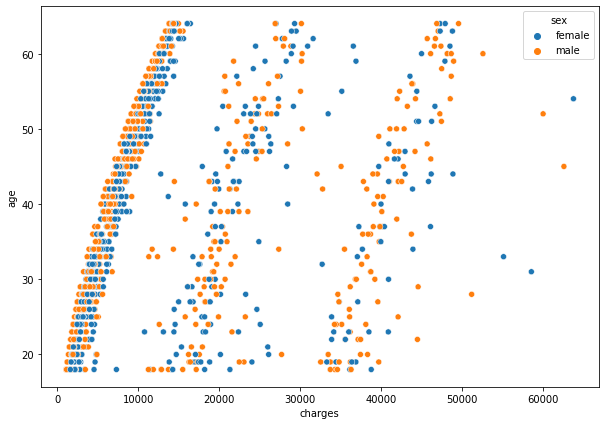

In [65]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data, y="age", x="charges", hue="sex");

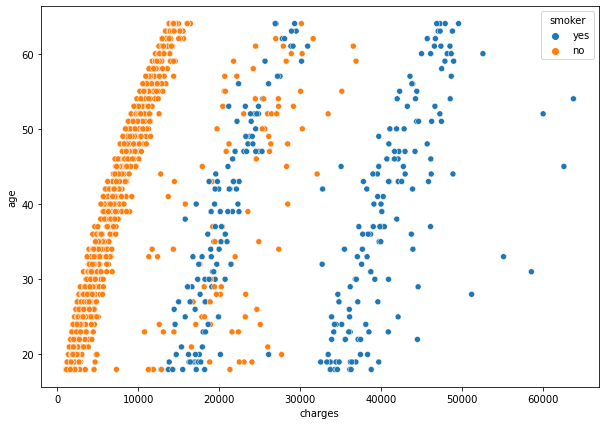

In [66]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data, y="age", x="charges", hue="smoker");

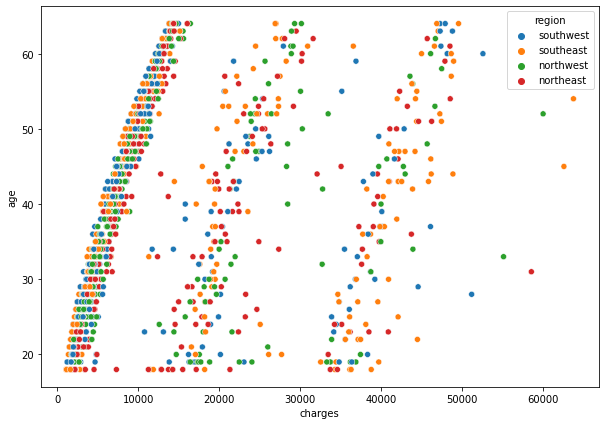

In [67]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data, y="age", x="charges", hue="region");

In [68]:
data.groupby(["smoker","region"]).count()

age  sex  bmi  children  charges
smoker region                                     
no     northeast  257  257  257       257      257
       northwest  267  267  267       267      267
       southeast  273  273  273       273      273
       southwest  267  267  267       267      267
yes    northeast   67   67   67        67       67
       northwest   58   58   58        58       58
       southeast   91   91   91        91       91
       southwest   58   58   58        58       58

In [69]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [70]:
data.groupby("sex").mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [71]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<AxesSubplot:xlabel='region', ylabel='charges'>

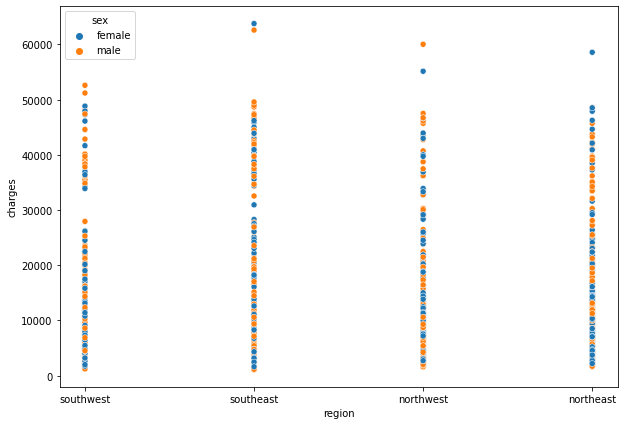

In [72]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data, y="charges", x="region", hue="sex")

In [73]:
data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [74]:
data.groupby(["sex","region"]).count()

age  bmi  children  smoker  charges
sex    region                                        
female northeast  161  161       161     161      161
       northwest  164  164       164     164      164
       southeast  175  175       175     175      175
       southwest  162  162       162     162      162
male   northeast  163  163       163     163      163
       northwest  161  161       161     161      161
       southeast  189  189       189     189      189
       southwest  163  163       163     163      163

### Converting Object columns to numerical columns using map

In [75]:
smoker_map = {"yes": 1, "no": 0}
sex_map = {"male": 0, "female": 1}
region_map = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}

In [76]:
data["smoker"] = data["smoker"].map(smoker_map)
data["sex"] = data["sex"].map(sex_map)
data["region"] = data["region"].map(region_map)

In [77]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [79]:
data["sex"].value_counts(), data["region"].value_counts(), data["smoker"].value_counts()

(0    676
 1    662
 Name: sex, dtype: int64,
 1    364
 0    325
 2    325
 3    324
 Name: region, dtype: int64,
 0    1064
 1     274
 Name: smoker, dtype: int64)

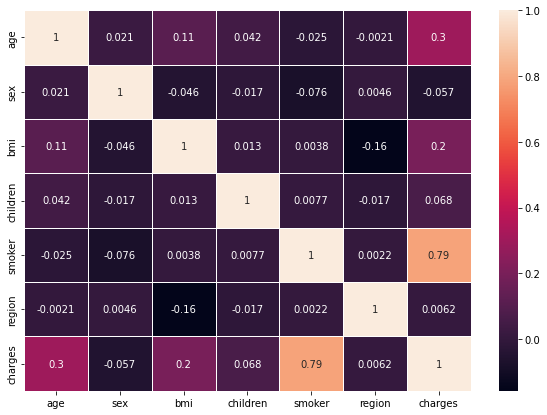

In [80]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, linewidths=1);

### Import models and carry out regression 

In [81]:
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor


# Import train test split to split data
from sklearn.model_selection import train_test_split, cross_val_score

# Import evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [82]:
def evaluate_model(y_true, y_pred, model):
    
    score = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    print(f"This is a {model} model")
    print(f"score: {score:.2f}")
    print(f"mean absolute error: {mae:.2f}")
    print(f"mean squared error: {mse:.2f}")

In [83]:
By, Lr, rig, sv, kn, rf, Et = BayesianRidge(), LogisticRegression(), Ridge(), SVR(), KNeighborsRegressor(), RandomForestRegressor(), ExtraTreesRegressor()

In [84]:
np.random.seed(0)
x = data.drop("charges", axis=1)
y = data["charges"]

#split my data into features and label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

#fit my models
By.fit(x_train, y_train)
# Lr.fit(x_train, y_train)
rig.fit(x_train, y_train)
sv.fit(x_train, y_train)
kn.fit(x_train, y_train)
rf.fit(x_train, y_train)
Et.fit(x_train, y_train)

#Make predictions with the models
y_pred_By = By.predict(x_test)
# y_pred_Lr = Lr.predict(x_test)
y_pred_rig = rig.predict(x_test)
y_pred_sv = sv.predict(x_test)
y_pred_kn = kn.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_Et = Et.predict(x_test)

In [85]:
evaluate_model(y_test, y_pred_By, "Bayesian Ridge")

This is a Bayesian Ridge model
score: 0.80
mean absolute error: 4003.94
mean squared error: 32091910.75


In [86]:
evaluate_model(y_test, y_pred_rig, "Ridge")

This is a Ridge model
score: 0.80
mean absolute error: 4012.12
mean squared error: 32119752.83


In [87]:
evaluate_model(y_test, y_pred_sv, "SVR")

This is a SVR model
score: -0.10
mean absolute error: 8535.16
mean squared error: 172823393.35


In [88]:
evaluate_model(y_test, y_pred_kn, "K Neighbour Regressor")

This is a K Neighbour Regressor model
score: 0.19
mean absolute error: 7981.43
mean squared error: 127610789.13


In [89]:
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

This is a Random Forest Regressor model
score: 0.87
mean absolute error: 2739.98
mean squared error: 20310770.87


In [90]:
evaluate_model(y_test, y_pred_Et, "Extra Tree Regressor")

This is a Extra Tree Regressor model
score: 0.86
mean absolute error: 2665.33
mean squared error: 21928714.93


In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
sc = StandardScaler()
x_train_2 = sc.fit_transform(x_train)
x_test_2 = sc.transform(x_test)

By.fit(x_train_2, y_train)
rig.fit(x_train_2, y_train)
sv.fit(x_train_2, y_train)
kn.fit(x_train_2, y_train)
rf.fit(x_train_2, y_train)
Et.fit(x_train_2, y_train)

#Make predictions with the models
y_pred_By2 = By.predict(x_test_2)
y_pred_rig2 = rig.predict(x_test_2)
y_pred_sv2 = sv.predict(x_test_2)
y_pred_kn2 = kn.predict(x_test_2)
y_pred_rf2 = rf.predict(x_test_2)
y_pred_Et2 = Et.predict(x_test_2)

In [93]:
evaluate_model(y_test, y_pred_By2, "Bayesian Ridge")

This is a Bayesian Ridge model
score: 0.80
mean absolute error: 4002.87
mean squared error: 32097164.59


In [94]:
evaluate_model(y_test, y_pred_rig2, "Ridge")

This is a Ridge model
score: 0.80
mean absolute error: 4000.38
mean squared error: 32084423.34


In [95]:
evaluate_model(y_test, y_pred_sv2, "SVR")

This is a SVR model
score: -0.09
mean absolute error: 8539.25
mean squared error: 172182460.38


In [96]:
evaluate_model(y_test, y_pred_kn2, "K Neighbour Regressor")

This is a K Neighbour Regressor model
score: 0.85
mean absolute error: 3225.94
mean squared error: 23881577.50


In [97]:
evaluate_model(y_test, y_pred_rf2, "Random Forest Regressor")

This is a Random Forest Regressor model
score: 0.87
mean absolute error: 2772.76
mean squared error: 20710068.59


In [98]:
evaluate_model(y_test, y_pred_Et2, "Extra Tree Regressor")

This is a Extra Tree Regressor model
score: 0.86
mean absolute error: 2748.94
mean squared error: 22683906.30


Text(0.5, 0, 'Feature Importance')

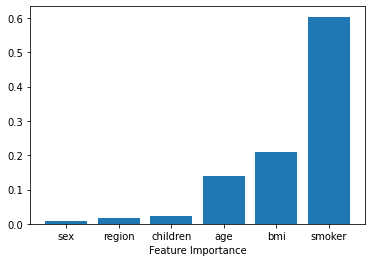

In [99]:
sort = rf.feature_importances_.argsort()
plt.bar(data.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [100]:
cross_val_score(rf, x, y, cv=5)

array([0.85050741, 0.77644755, 0.86945889, 0.82460493, 0.85278491])

In [101]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
np.random.seed(26)

# create my grid
grid = {"n_estimators": [500, 1000, 1200, 1500],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["auto", "sqrt", "log2"],
        "max_depth": [None, 5, 10, 20]}

rf = RandomForestRegressor(n_jobs=1)

rf_clf = RandomizedSearchCV(estimator=rf,
                            param_distributions=grid,
                            n_iter=30,
                            cv=5,
                            verbose=2)

# fit RandomizedSearchCV
rf_clf.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1500; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1500; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1500; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1500; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1500; total time=   1.5s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.5s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.4s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.4s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.4s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=None, max

C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.4s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.4s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.4s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.4s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.0s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.6s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.6s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.5s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.6s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.8s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt,

C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.5s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.6s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.5s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.5s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1500; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1500; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, m

C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.7s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.7s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.7s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.7s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1500; total time=   1.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1500; total time=   1.4s
[CV] END max_depth=None, max_feat

C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.7s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.7s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.7s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.7s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.5s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.4s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.4s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.5s


C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=10, m

C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=1), n_iter=30,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [500, 1000, 1200,
                                                         1500]},
                   verbose=2)

In [102]:
rf_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 5}

In [103]:
rf_tuned = RandomForestRegressor(n_estimators= 1200,
                                 min_samples_split=6,
                                 min_samples_leaf=2,
                                 max_features="auto",
                                 max_depth=5)

rf_tuned.fit(x_train, y_train)

# make prediction and evaluate
y_pred_tuned = rf_tuned.predict(x_test)

evaluate_model(y_test, y_pred_tuned, "Tuned Random Forest")

C:\Users\CoE_Mobile\Desktop\TY\my_venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


This is a Tuned Random Forest model
score: 0.90
mean absolute error: 2429.79
mean squared error: 15385632.84


Text(0.5, 0, 'Feature Importance')

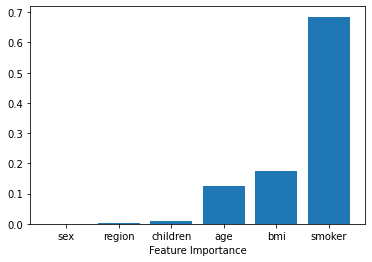

In [104]:
sort = rf_tuned.feature_importances_.argsort()
plt.bar(data.columns[sort], rf_tuned.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [105]:
charges = pd.DataFrame({"Actual Pice": y_test, "Predicted Price": y_pred_tuned})

In [106]:
charges.head(20)

,Actual Pice,Predicted Price
578,9724.53000,12107.388412
610,8547.69130,10569.662631
569,45702.02235,45131.974092
1034,12950.07120,13833.722500
198,9644.25250,11061.341877
981,4500.33925,7225.450491
31,2198.18985,2746.964574
1256,11436.73815,12592.929915
1219,7537.16390,7297.458366
1320,5425.02335,6684.589799
